<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_T_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('/content/MNQ20201213_to_20201218170000.pkl')

In [3]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [4]:
df.drop('time', axis=1, inplace=True)

In [5]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [6]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-12-13 18:00:00')

In [7]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [8]:
 


df["dev"] = df.close - df.open
df["jump"] = df.high - df.low
df["up"] = df.dev > 5
df["down"] = df.dev < -5 


 

In [9]:
df = df[df.jump.ne(0.0)]

In [10]:
df["stdv"] = df.dev.rolling(window=60, min_periods=1).std()
df["mu"] = df.dev.ne(0).rolling(window=60, min_periods=1).mean()
df["t"] = (df.dev - df.mu) / df.stdv

In [11]:
df["pf10sec"] = (df.avg.shift(-2)-df.avg).fillna(0.0)
df["pf30sec"] = (df.avg.shift(-6)-df.avg).fillna(0.0)
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df.tail()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,dev,jump,up,down,stdv,mu,t,pf10sec,pf30sec,pfmin
81895,12750.00,12750.00,12749.50,12750.00,12749.750,6,2020-12-18 16:59:35,16,59,35,18,4,0.00,0.50,False,False,0.766025,0.850000,-1.109625,0.150,0.0,0.0
81896,12749.75,12750.25,12749.25,12749.75,12749.925,26,2020-12-18 16:59:40,16,59,40,18,4,0.00,1.00,False,False,0.765368,0.833333,-1.088802,-0.025,0.0,0.0
81897,12750.00,12750.50,12749.25,12749.75,12749.900,21,2020-12-18 16:59:45,16,59,45,18,4,-0.25,1.25,False,False,0.765368,0.833333,-1.415442,1.250,0.0,0.0
81898,12749.25,12751.00,12749.25,12749.25,12749.900,5,2020-12-18 16:59:50,16,59,50,18,4,0.00,1.75,False,False,0.764641,0.816667,-1.068040,0.000,0.0,0.0
81899,12749.00,12753.50,12749.00,12749.00,12751.150,28,2020-12-18 16:59:55,16,59,55,18,4,0.00,4.50,False,False,0.758136,0.800000,-1.055219,0.000,0.0,0.0


In [12]:
df[(df.pf10sec>5)|(df.pf10sec<-5)].shape[0]*(5*2-2*0.47)/2

2029.44

In [13]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

In [14]:
data = df[abs(df.t) >3]
data.shape

(3634, 22)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


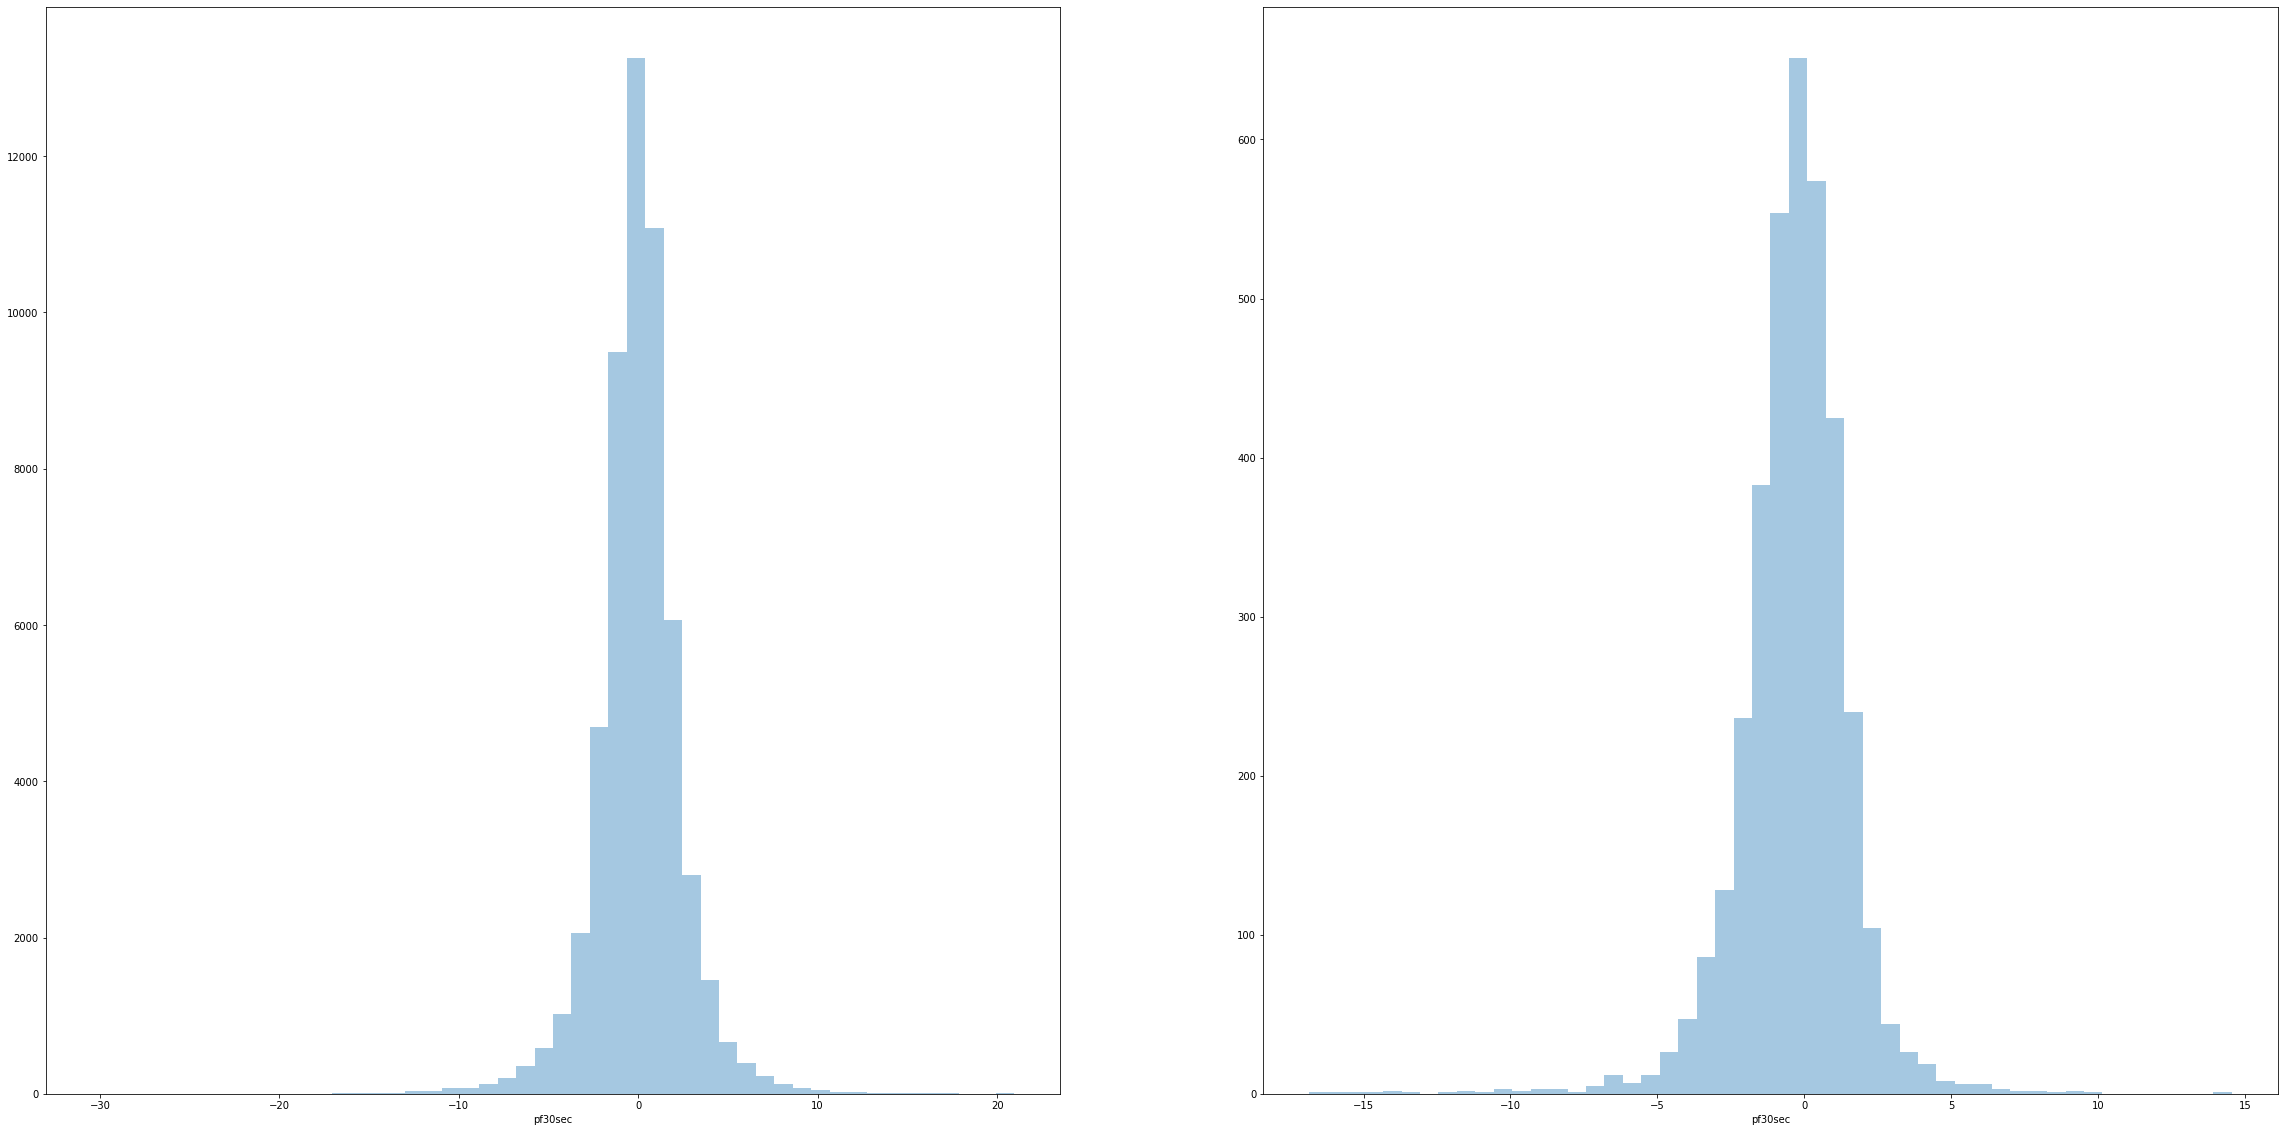

In [15]:
a4_dims = (40,20)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=a4_dims)
sns.distplot(df.pf30sec, kde=False, ax=axes[0])
sns.distplot(data.pf30sec, kde=False, ax=axes[1])
plt.show()

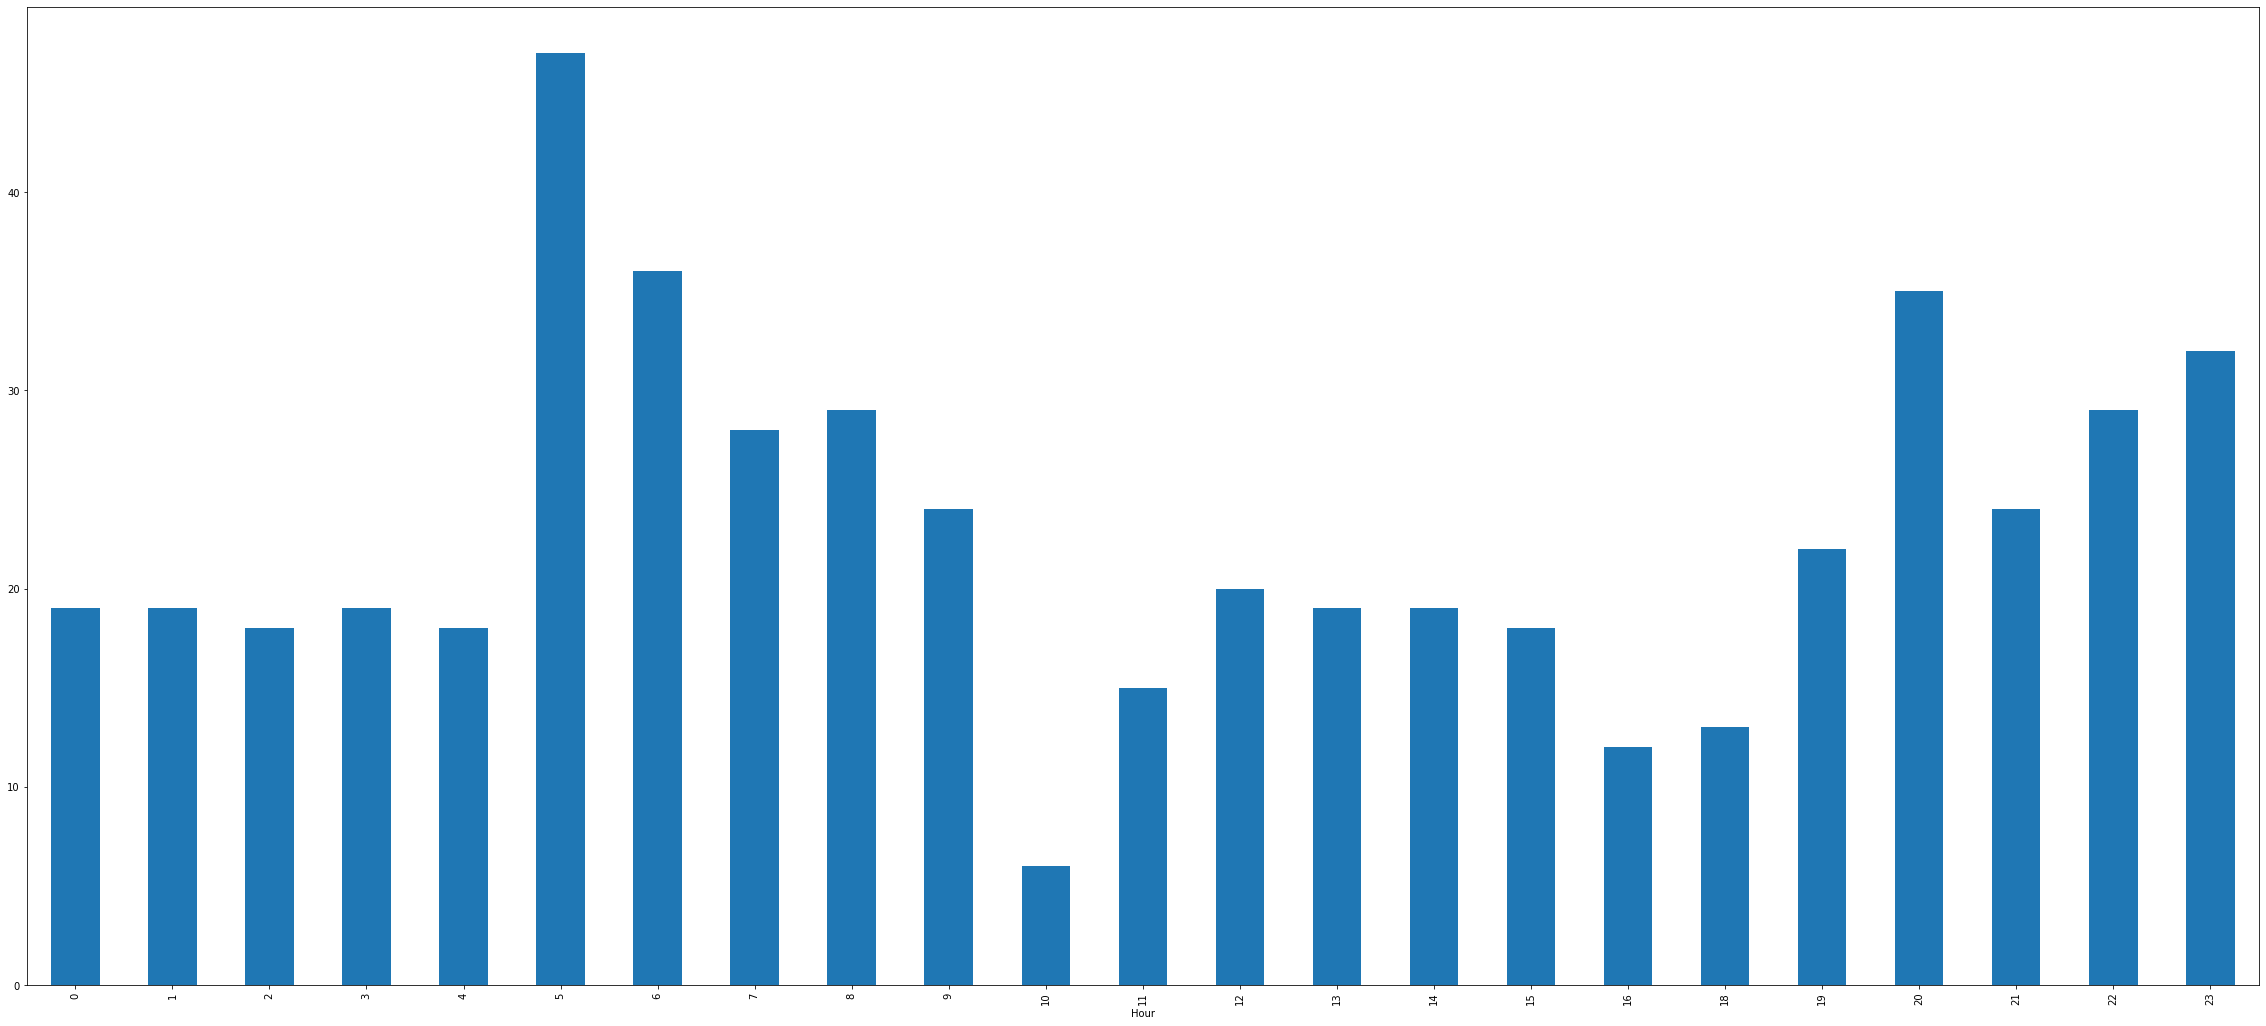

In [19]:
a4_dims = (40,18)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=a4_dims)
data[data.TradeDay==1].groupby(data.Hour)["pf10sec"].count().plot(kind="bar")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


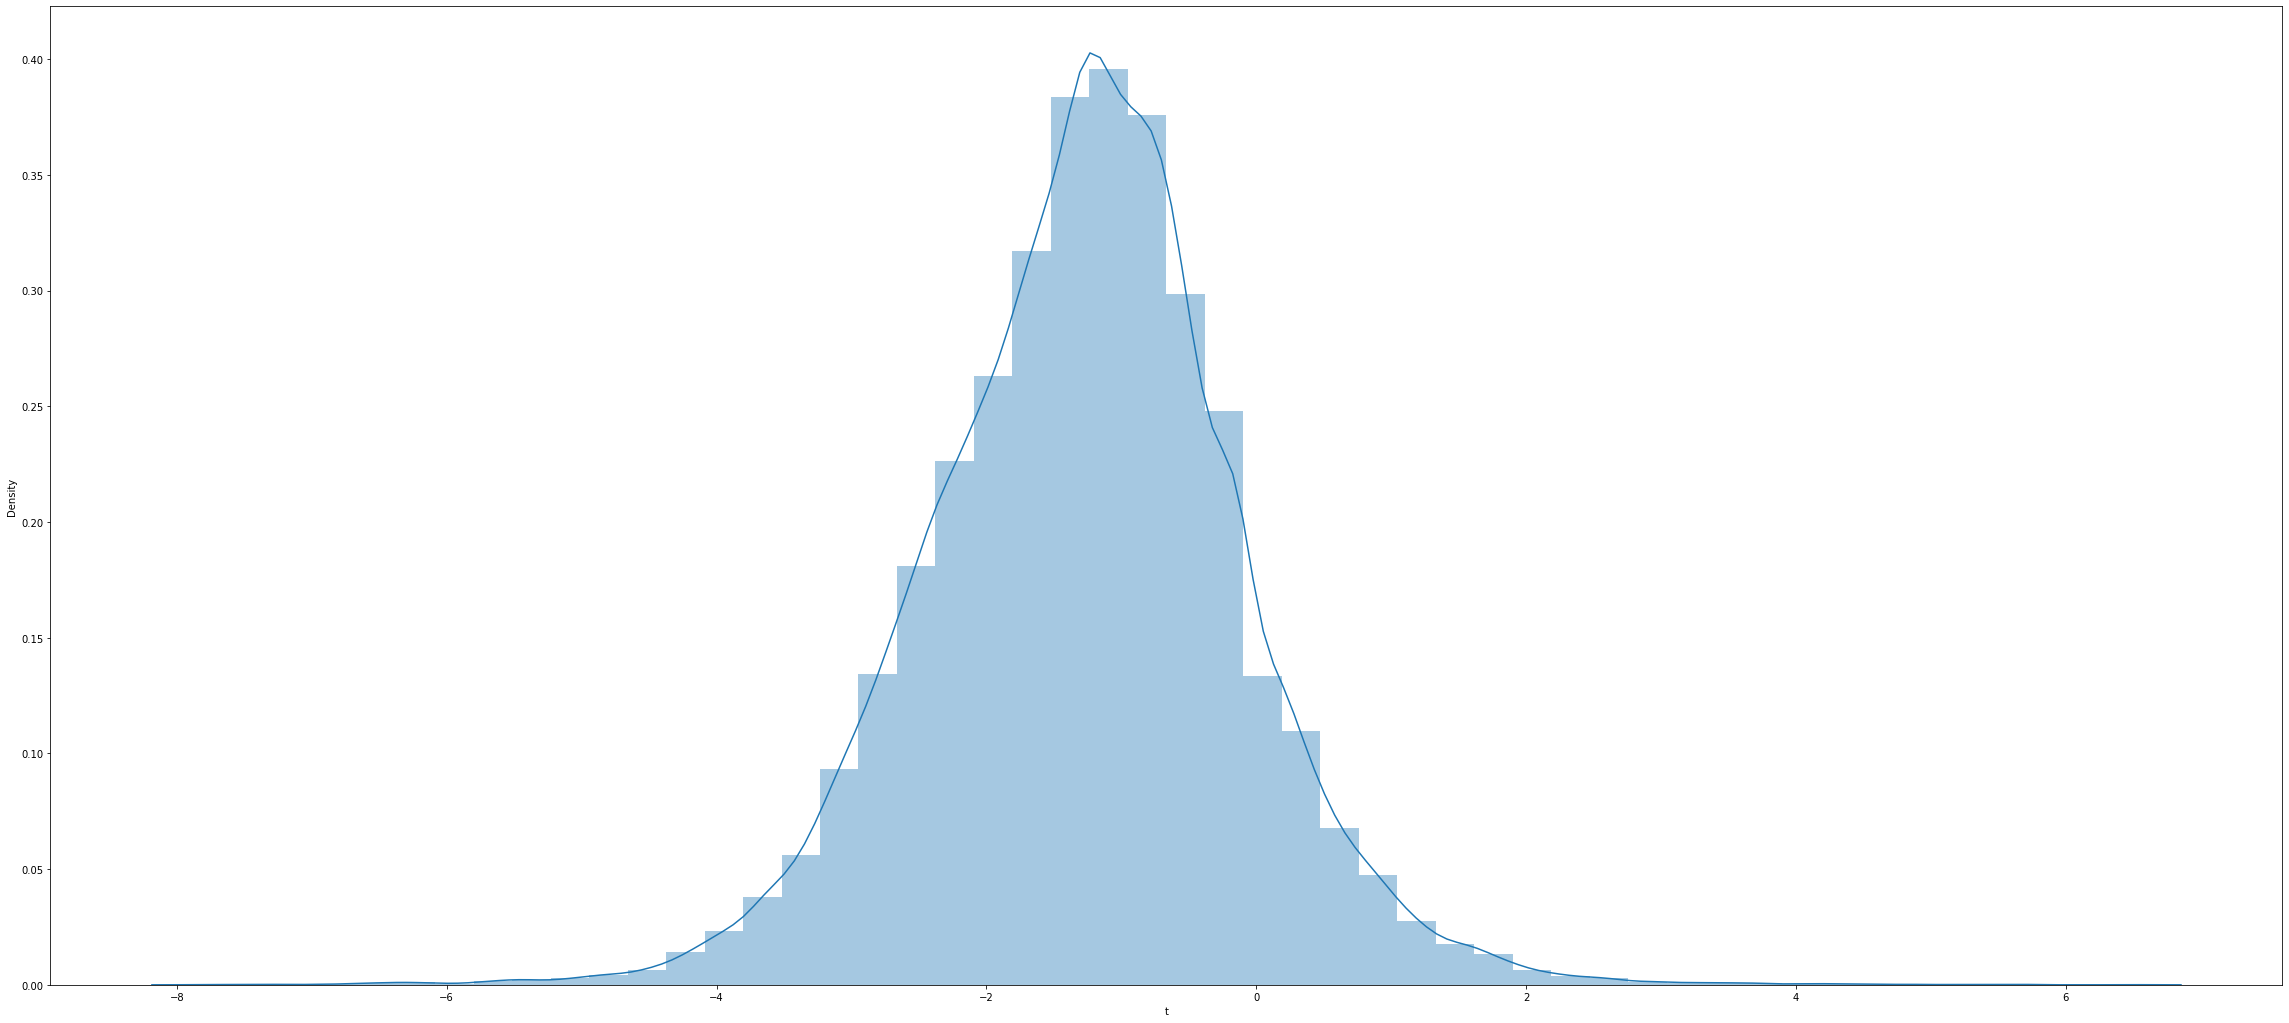

In [20]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df.t)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


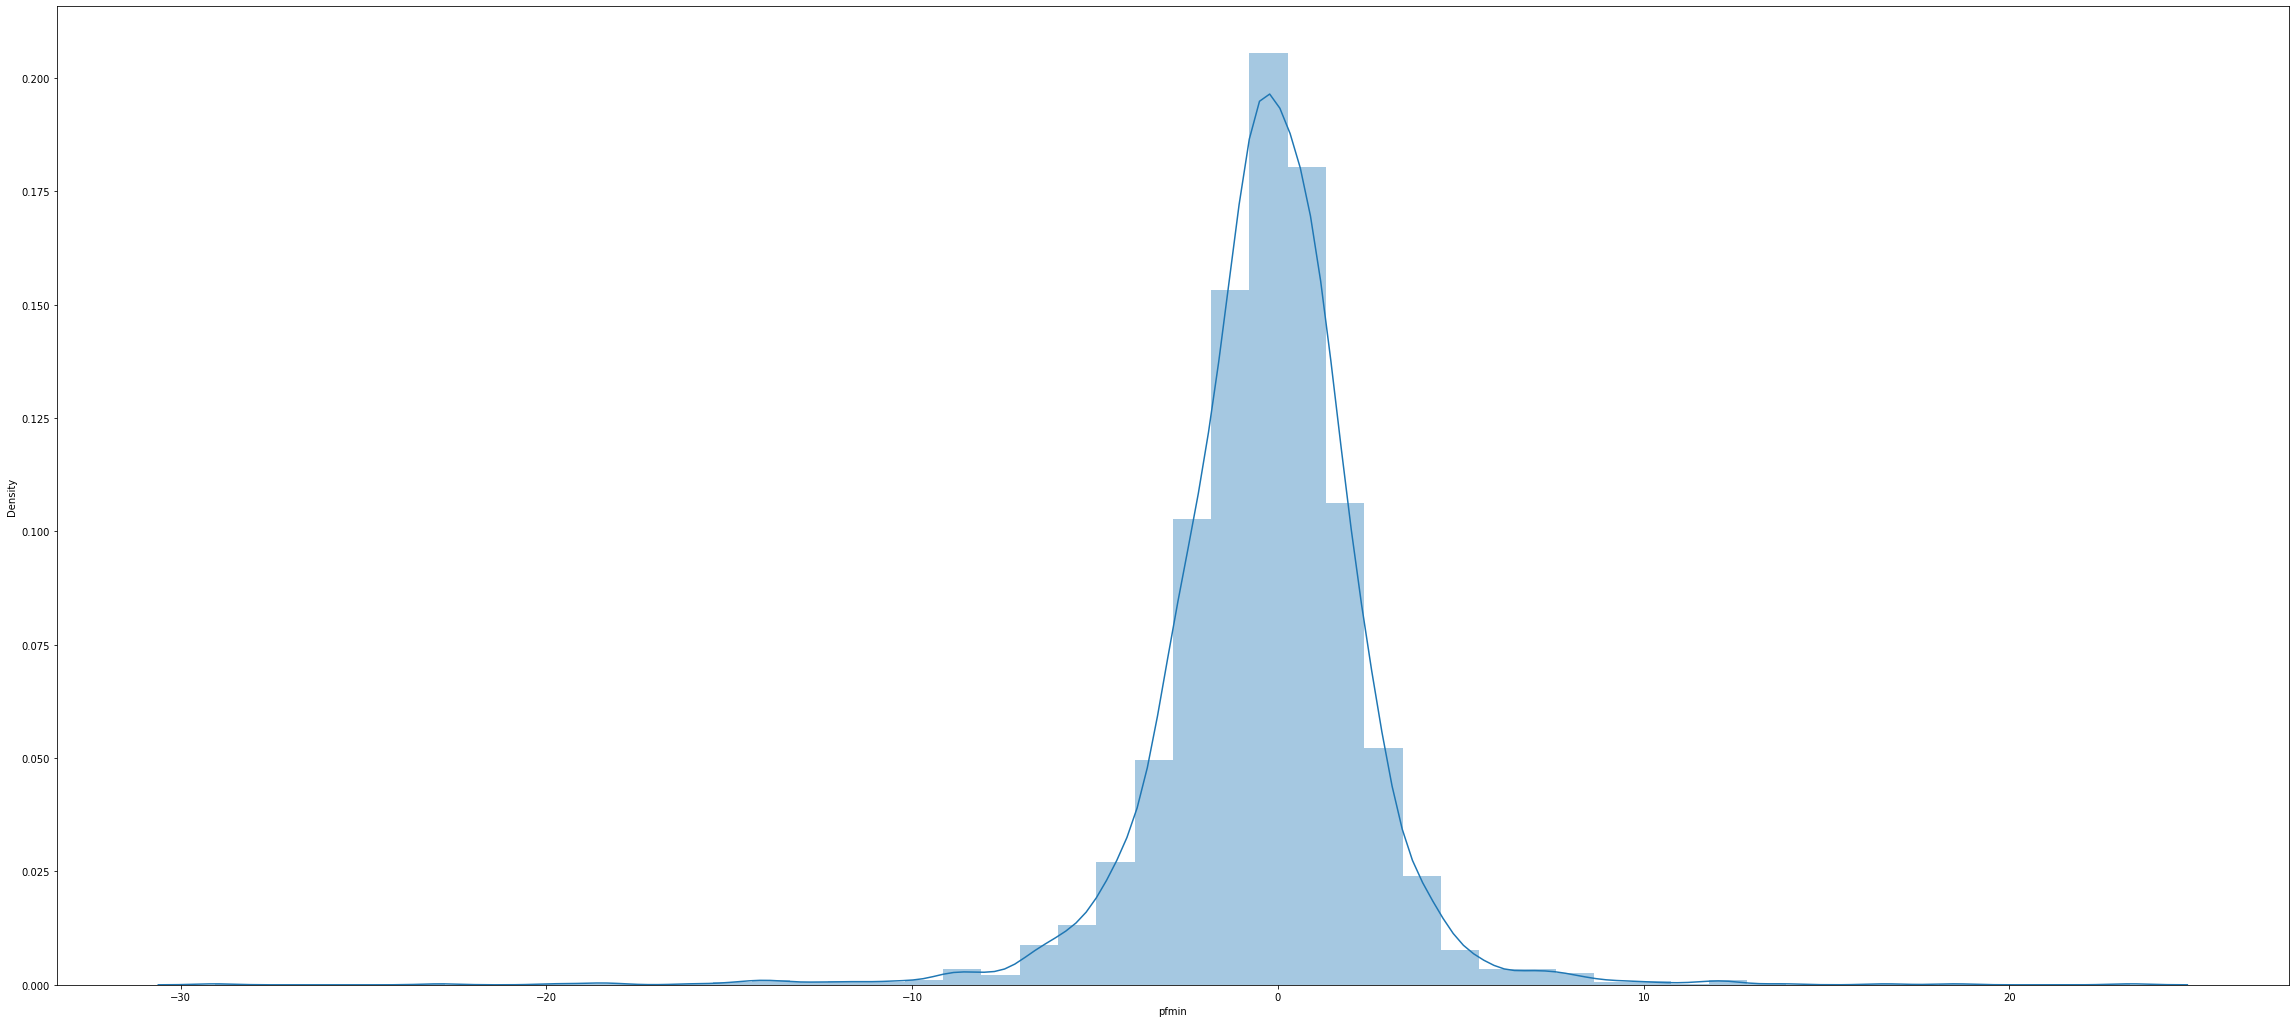

In [21]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(data.pfmin)

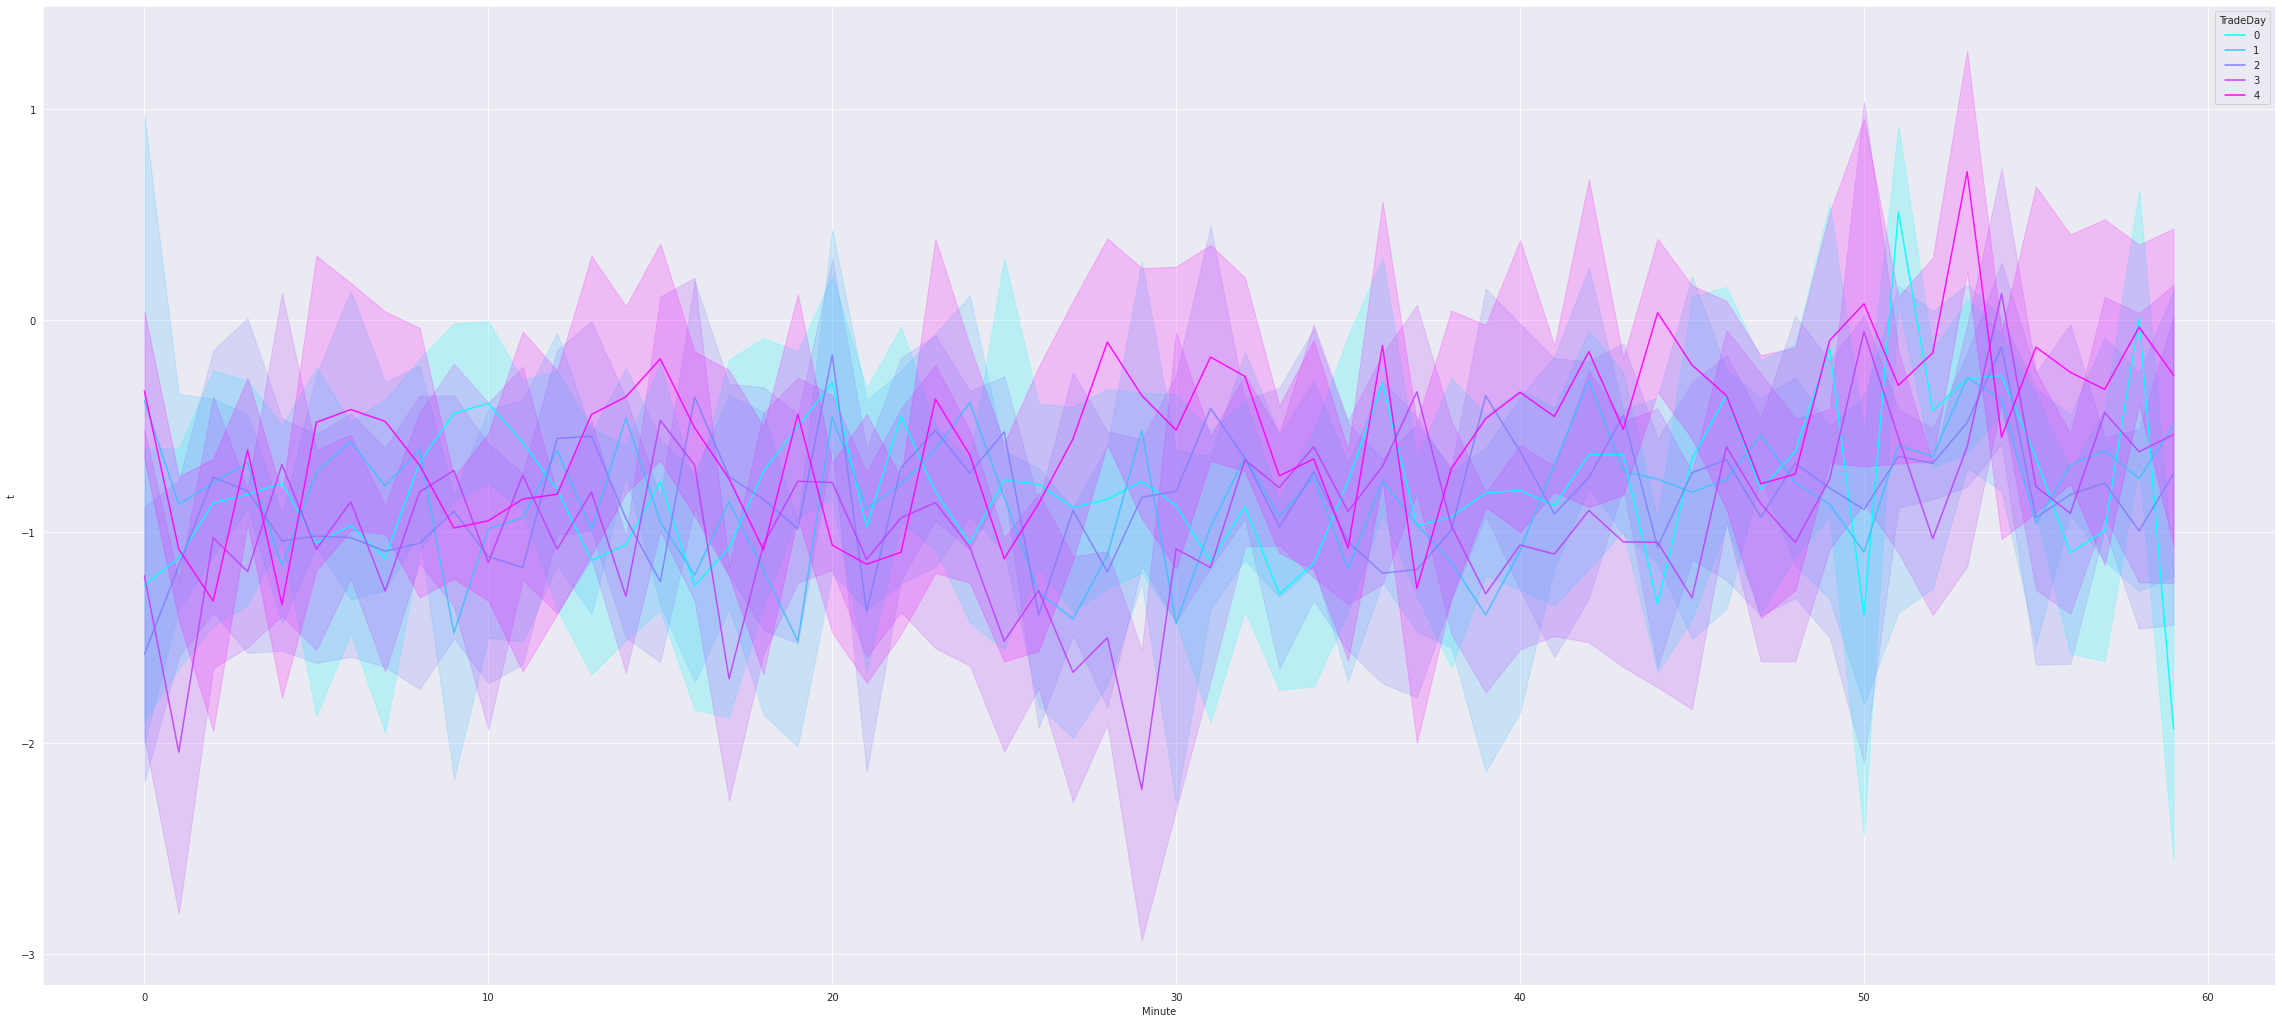

In [22]:
data=df[df.Hour==15]
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.t, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [23]:
df[abs(df.stdv)==0.0].groupby(df.Hour)["stdv"].count()


Series([], Name: stdv, dtype: int64)

In [ ]:
for index, row in df.iterrows():
  if row["t_val24"] > 2:
    print(row["avg"])